![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 4-MODUL. VIZUALIZASIYA

## 4-AMALIYOT. Distribution


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Ushbu amaliyotda uybor.uz saytidan yuklab olingan ma'lumotlar tahlili bilan shu'gullanamiz.

In [9]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/blob/main/uybor_scrapping.csv?raw=true")
df.head()

,location,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,41.300156,69.210831


#### Yuqoridagi jadvalda Toshkent shahridagi sotildagian uylar haqida ma'lumotlar jamlangan.

## 1-VAZIFA. Jadvaldan xonalari 5 xonadan ko'p bo'lgan, narxi 200000 mingdan, maydoni 250kv.m dan ortiq bo'lgan uylarni tashlab yuboring

In [17]:
df=df[df['rooms']<6]
df=df[df['price']<200_000]
df=df[df['size']<250]
df.shape

(7216, 9)

In [ ]:
#@title Natija
df=df[df['rooms']<6]
df=df[df['size']<250]
df=df[df['price']<200000]
df.shape

(7216, 9)

## 2-VAZIFA. `subplot` yordamida uylarning narxi va maydoni taqsimoti grafiklarini yonma yon chizing

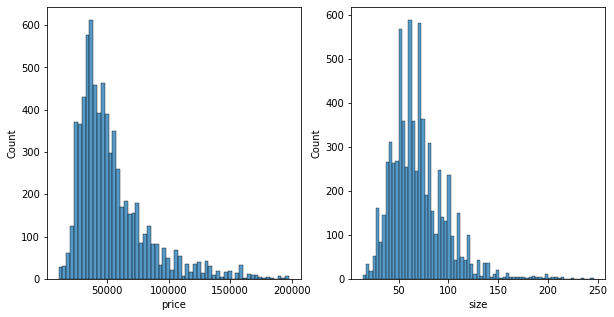

In [19]:
#JAVOBINGIZNI SHUYERGA YOZING
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='price')
plt.subplot(1,2,2)
sns.histplot(data=df, x='size')
plt.show()


### 2-VAZIFA. Uylarning narxi taqsimoti va narx va maydoni o'rtasidagi bog'liqlik grafiklarini bitta chizmada ustma ust chiqaring.

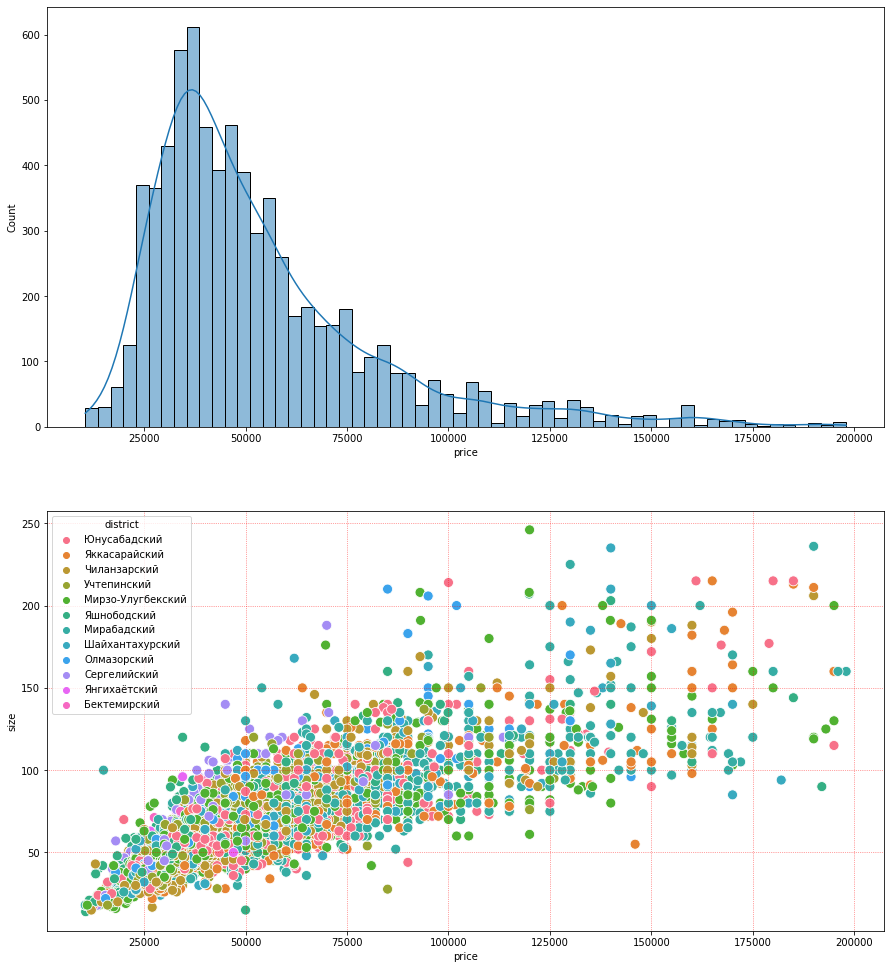

In [23]:
fig,axs=plt.subplots(nrows=2, ncols=1,figsize=(15,17))
sns.histplot(data=df,x='price', ax=axs[0],kde=True)
sns.scatterplot(data=df, x='price',y='size', s=100, hue='district', ax=axs[1])
plt.grid(linestyle=':', linewidth=.7, color='r', alpha=.7)
plt.show()

### 3-VAZIFA. Quyidagi grafikni chizing. Ahamiyat bering, oxirgi grafikda tumanlar bo'yicha uylarning o'rtacha narxi tasvirlangan.

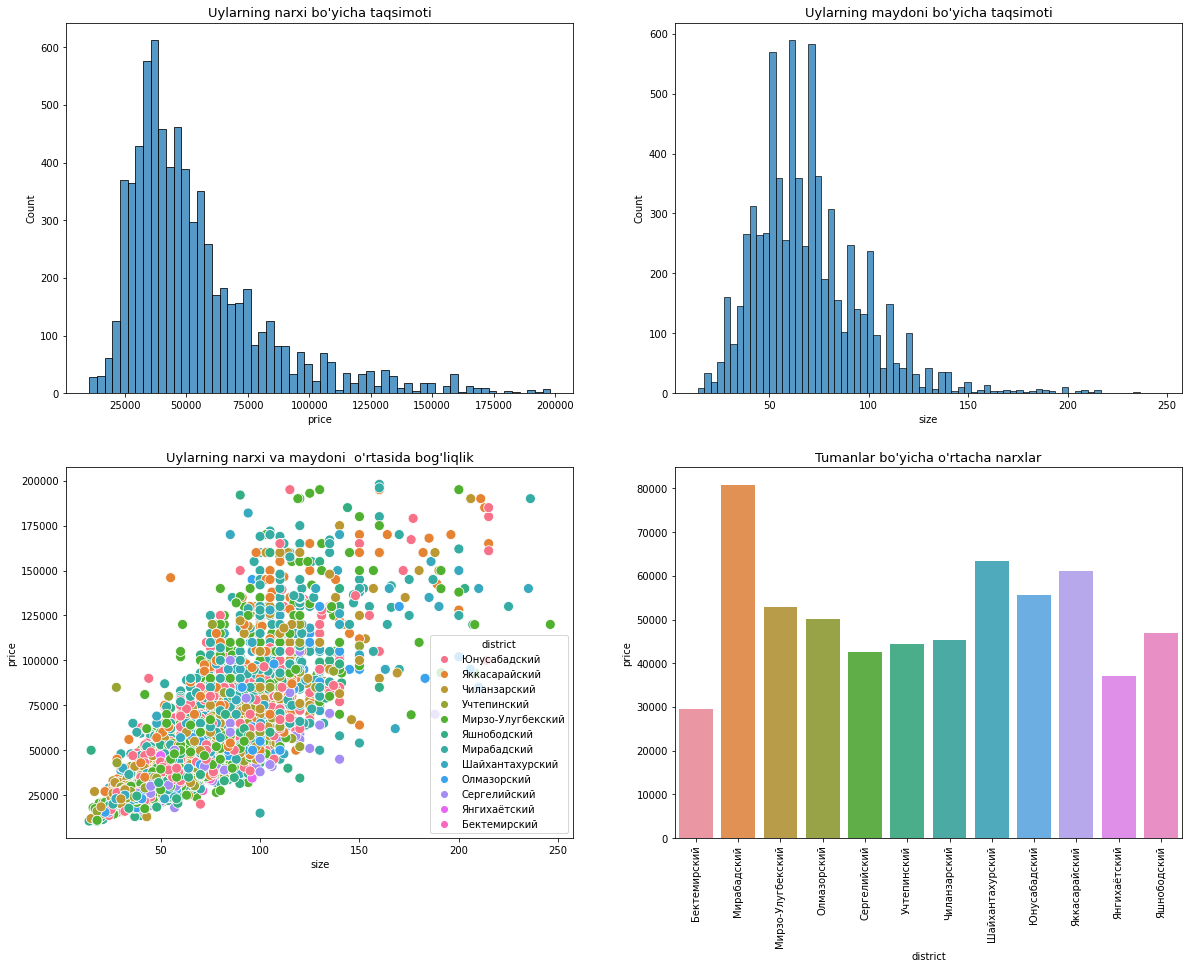

In [34]:
# getting mean grouped by districts
distrct_df=df.groupby('district').mean()
# creating subplots with given size
fig, axs=plt.subplots(2,2, figsize=(20,15))
# plot all 4 graphs
sns.histplot(data=df, x='price', ax=axs[0,0])
sns.histplot(data=df, x='size', ax=axs[0,1])
sns.scatterplot(data=df, x='size', y='price', s=100, ax=axs[1,0], hue='district')
sns.barplot(data=df, x=distrct_df.index, y=distrct_df['price'], ax=axs[1,1])
# changing Title of every plot given by its locations
axs[0,0].set_title('Uylarning narxi bo\'yicha taqsimoti', fontsize=13)
axs[0,1].set_title('Uylarning maydoni bo\'yicha taqsimoti', fontsize=13)
axs[1,0].set_title('Uylarning narxi va maydoni  o\'rtasida bog\'liqlik', fontsize=13)
axs[1,1].set_title('Tumanlar bo\'yicha o\'rtacha narxlar', fontsize=13)
# rotate the exact plot's xticks by tick_params with the argument of labelrotation
axs[1,1].tick_params(axis='x', labelrotation=90) 
plt.savefig('ubor - distribution - subplots x 4 about ')
plt.show()